# **CSST106 - Perception and Computer Vision**
# **MACHINE PROBLEM 4**

# **Esguerra, Nashrudin Maverick A. from BSCS-IS-4B**

# **IMPORT LIBLARIES**

In [ ]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [ ]:
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [ ]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 337687, done.
remote: Counting objects: 100% (907/907), done.
remote: Compressing objects: 100% (714/714), done.
remote: Total 337687 (delta 375), reused 478 (delta 155), pack-reused 336780 (from 1)
Receiving objects: 100% (337687/337687), 528.21 MiB | 23.18 MiB/s, done.
Resolving deltas: 100% (235498/235498), done.
Updating files: 100% (7566/7566), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41779, done.
remote: Counting objects: 100% (1529/1529), done.
remote: Compressing objects: 100% (1110/1110), done.
remote: Total 41779 (delta 581), reused 1014 (delta 330), pack-reused 40250 (from 1)
Receiving objects: 100% (41779/41779), 150.32 MiB | 26.83 MiB/s, done.
Resolving deltas: 100% (25711/25711), done.


In [ ]:
%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  8%] Linking CXX executable 

# ***Machine Problem No. 4: Feature Extraction and Image Matching in Computer Visiont***

# ***Task 1: Harris Corner Detection***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


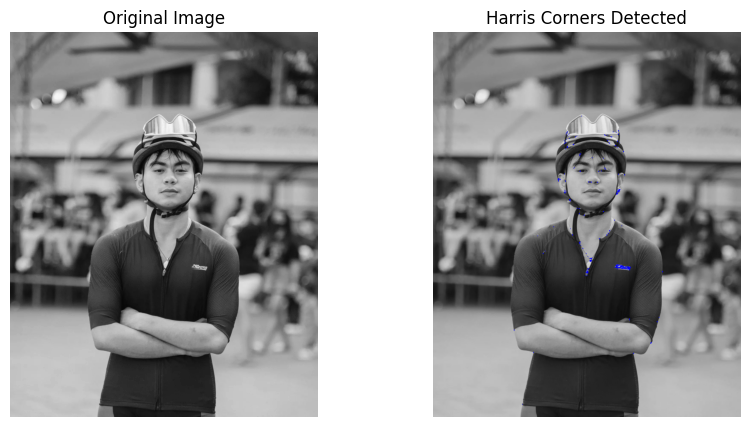

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Convert to float32
    img_float = np.float32(img)

    # Apply Harris Corner Detection
    corners = cv2.cornerHarris(img_float, blockSize=2, ksize=3, k=0.04)

    # Result is dilated to mark the corners
    corners = cv2.dilate(corners, None)

    # Create an output image to display corners
    output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    output_img[corners > 0.01 * corners.max()] = [0, 0, 255]  # Mark corners in red

    # Display the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(output_img)
    plt.title('Harris Corners Detected')
    plt.axis('off')

    plt.show()

# Example usage
harris_corner_detection('/content/drive/MyDrive/Nash.jpg')


# ***Task 2: HOG Feature Extraction***

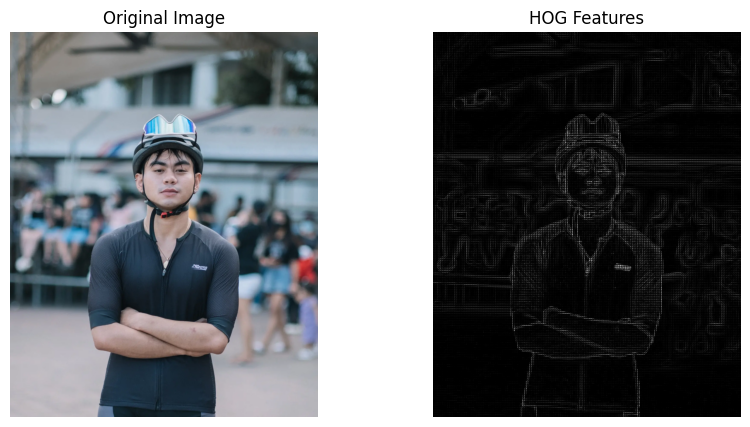

In [3]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

def hog_feature_extraction(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Extract HOG features and the corresponding visualization
    hog_features, hog_image = hog(
        gray_img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        visualize=True,
        block_norm='L2-Hys'
    )

    # Rescale the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Display the original image and the HOG features visualization
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')

    plt.show()

# Example usage
hog_feature_extraction('/content/drive/MyDrive/Nash.jpg')


# ***Task 3: ORB Feature Extraction and Matching***

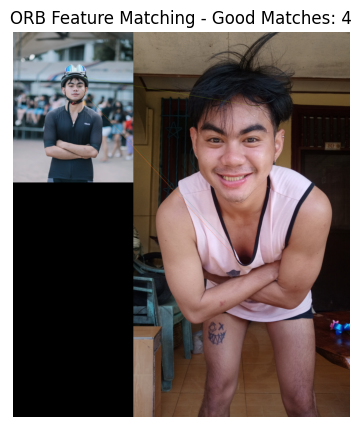

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def orb_feature_matching(image_path1, image_path2):
    # Load the images
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    if img1 is None or img2 is None:
        print("Error: Unable to load one or both images.")
        return

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Set up FLANN matcher
    index_params = dict(algorithm=6,  # FLANN_INDEX_LSH
                        table_number=6,  # 12 is a good value
                        key_size=12,  # Size of the key
                        multi_probe_level=1)  # How many times to search
    search_params = dict(checks=50)  # or pass empty dictionary

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors using KNN
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Filter good matches using the ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw the matches
    def draw_matches(img1, keypoints1, img2, keypoints2, matches):
        img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None,
                                       flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        return img_matches

    img_matches = draw_matches(img1, keypoints1, img2, keypoints2, good_matches)

    # Display the matching keypoints
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title(f'ORB Feature Matching - Good Matches: {len(good_matches)}')
    plt.axis('off')
    plt.show()

# Example usage
orb_feature_matching('/content/drive/MyDrive/Nash.jpg', '/content/drive/MyDrive/Nash2.jpg')


# ***Task 4: SIFT and SURF Feature Extraction***

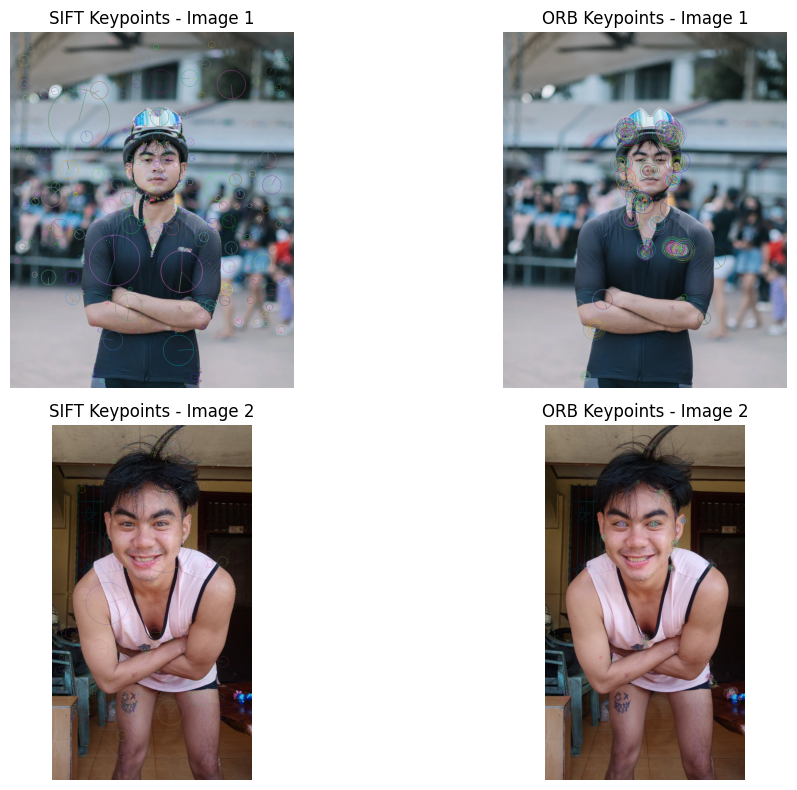

In [10]:
import cv2
import matplotlib.pyplot as plt

def sift_and_orb_feature_extraction(image_path1, image_path2):
    # Load the images
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    if img1 is None:
        print(f"Error: Unable to load image 1 from {image_path1}.")
        return
    if img2 is None:
        print(f"Error: Unable to load image 2 from {image_path2}.")
        return

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Initialize ORB detector instead of SURF
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints_sift1, descriptors_sift1 = sift.detectAndCompute(gray1, None)
    keypoints_sift2, descriptors_sift2 = sift.detectAndCompute(gray2, None)

    # Detect keypoints and compute descriptors for ORB
    keypoints_orb1, descriptors_orb1 = orb.detectAndCompute(gray1, None)
    keypoints_orb2, descriptors_orb2 = orb.detectAndCompute(gray2, None)

    # Draw SIFT keypoints
    img_sift1 = cv2.drawKeypoints(img1, keypoints_sift1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_sift2 = cv2.drawKeypoints(img2, keypoints_sift2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Draw ORB keypoints
    img_orb1 = cv2.drawKeypoints(img1, keypoints_orb1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_orb2 = cv2.drawKeypoints(img2, keypoints_orb2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


    # Display the keypoints for SIFT and ORB
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img_sift1, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints - Image 1')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(img_orb1, cv2.COLOR_BGR2RGB)) # Display ORB keypoints
    plt.title('ORB Keypoints - Image 1') # Update title
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(img_sift2, cv2.COLOR_BGR2RGB))
    plt.title('SIFT Keypoints - Image 2')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(img_orb2, cv2.COLOR_BGR2RGB)) # Display ORB keypoints
    plt.title('ORB Keypoints - Image 2') # Update title
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
sift_and_orb_feature_extraction('/content/drive/MyDrive/Nash.jpg', '/content/drive/MyDrive/Nash2.jpg')

# ***Task 5: Feature Matching using Brute-Force Matcher***

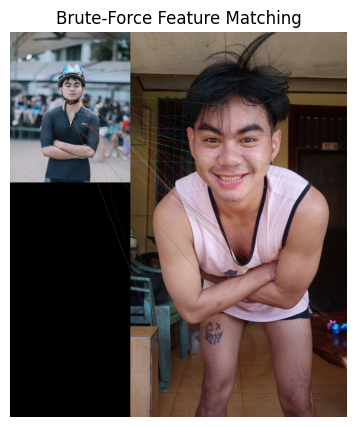

In [11]:
import cv2
import matplotlib.pyplot as plt

def brute_force_feature_matching(image_path1, image_path2):
    # Load the images
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    if img1 is None or img2 is None:
        print("Error: Unable to load one or both images.")
        return

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

    # Create a Brute-Force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance (best matches first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw the matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display the matching keypoints
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title('Brute-Force Feature Matching')
    plt.axis('off')
    plt.show()


# Example usage
brute_force_feature_matching('/content/drive/MyDrive/Nash.jpg', '/content/drive/MyDrive/Nash2.jpg')


# ***Task 6: Image Segmentation using Watershed Algorithm***

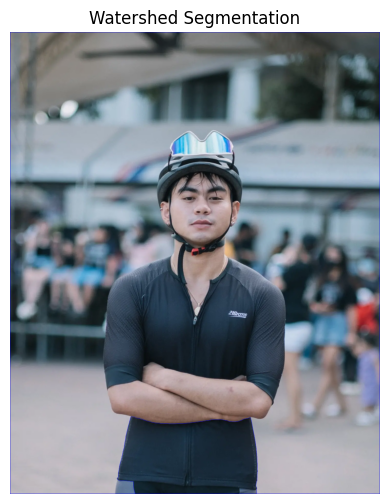

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed_segmentation(image_path):
    # Load the image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to get a binary image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Remove noise using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)

    # Add one to all the labels so that sure background is not zero
    markers = markers + 1
    markers[unknown == 255] = 0  # Mark the unknown region with zero

    # Apply the Watershed algorithm
    img[markers == -1] = [255, 0, 0]  # Mark the boundaries with red
    markers = cv2.watershed(img, markers)

    # Visualize the segmented image
    img[markers == -1] = [255, 0, 0]  # Mark boundaries in red
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Watershed Segmentation')
    plt.axis('off')
    plt.show()

# Example usage
watershed_segmentation('/content/drive/MyDrive/Nash.jpg')